# Exploring High Dimensional Data

You'll be introduced to the concept of dimensionality reduction and will learn when an why this is important. You'll learn the difference between feature selection and feature extraction and will apply both techniques for data exploration. The chapter ends with a lesson on t-SNE, a powerful feature extraction technique that will allow you to visualize a high-dimensional dataset.

## Introduction

Dimensionality: the number of columns (features) in the dataset, assuming you are working on a *tidy* dataset.

### Tidy data

In tidy data:

1. Each variable must have its own column.
1. Each observation must have its own row.
1. Each type of observational unit forms a table.

[What's Tidy Data?](https://towardsdatascience.com/whats-tidy-data-how-to-organize-messy-datasets-in-python-with-melt-and-pivotable-functions-5d52daa996c9)

Take for example this Pokemon dataset. 

| Name | Type | HP | Attack | Defense | Speed | Generation |
|------|------|:--:|:------:|:-------:|:-----:|:----------:|
| Bulbasaur | Grass | 45 | 49 | 49 | 45 | 1 |
| Ivysaur | Grass | 60 | 62 | 63 | 60 | 1 |
| Venusaur | Grass | 80 | 82 | 83 | 80 | 1 |
| Charmander | Fire | 39 | 52 | 43 | 65 | 1 |
| Charmeleon | Fire | 58 | 64 | 58 | 80 | 1 |

In [30]:
import pandas as pd

pokemon_df = pd.read_csv("data/pokemon_small.csv")

pokemon_df

,Name,Type,HP,Attack,Defense,Speed,Generation
0,Bulbasaur,Grass,45,49,49,45,1
1,Ivysaur,Grass,60,62,63,60,1
2,Venusaur,Grass,80,82,83,80,1
3,Charmander,Fire,39,52,43,65,1
4,Charmeleon,Fire,58,64,58,80,1


### The shape attribute

Will return a tuple with the number of rows and columns.

In [31]:
pokemon_df.shape

(5, 7)

When you have a large number of columns (say, more than 10) you have **high dimensionality**. This can make it difficult to find important patterns due to the complexity that comes with high dimensionality.

There are a number of dimensionality reduction techniques. These techniques can be useful for datasets with low dimensionality as well (like the Pokemon dataset).


Notice how all these Pokemon are from the same generation. If we are interested in how Pokemon are different this feature is not very useful. We could reduce the dimensionality by dropping that column.

To get a quick overview of which columns contain little variance, we can use the pandas DataFrame `.describe()` method.

In [32]:
pokemon_df.describe()

,HP,Attack,Defense,Speed,Generation
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,56.400000,61.800000,59.200000,66.000000,1.0
std,15.852445,12.969194,15.401299,14.747881,0.0
min,39.000000,49.000000,43.000000,45.000000,1.0
25%,45.000000,52.000000,49.000000,60.000000,1.0
50%,58.000000,62.000000,58.000000,65.000000,1.0
75%,60.000000,64.000000,63.000000,80.000000,1.0
max,80.000000,82.000000,83.000000,80.000000,1.0


Note that the standard deviation of the `Generation` column is 0, and the min and max are 1.

By default, `.describe()` ignores the non-numeric columns in a dataset. We can tell `.describe()` to do the opposite by passing `'number'` to the `'exclude'` argument. We'll then get summary statistics adapted to non-numeric data. 

In [33]:
pokemon_df.describe(exclude="number")

,Name,Type
count,5,5
unique,5,2
top,Bulbasaur,Grass
freq,1,3


Here we can see there are only 2 unique types of Pokemon in the dataset.

Getting comfortable with the shape of your dataset and the properties of the features within is a crucial step you should take before you make the decision to reduce dimensionality.

In [35]:
# setup
pokemon_df = pd.read_csv("data/pokemon.csv")

#### Finding the number of dimensions in a dataset

A larger sample of the Pokemon dataset has been loaded for you as the pandas DataFrame `pokemon_df`.

How many dimensions, or columns are in this dataset?

##### Instructions

*Possible answers**

1. 5 dimensions
2. 7 dimensions
3. 8 dimensions
4. 160 dimensions

In [36]:
pokemon_df.shape

(160, 7)

**Answer**
2. 7 dimensions

#### Removing features without variance

A sample of the Pokemon dataset has been loaded as `pokemon_df`. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.

##### Instructions 1/3

* Use the `.describe()` method to find the numeric feature without variance and remove its name from the list assigned to `number_cols`.

```python
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense', 'Generation']
```

In [37]:
pokemon_df.describe()

,HP,Attack,Defense,Generation
count,160.00000,160.00000,160.000000,160.0
mean,64.61250,74.98125,70.175000,1.0
std,27.92127,29.18009,28.883533,0.0
min,10.00000,5.00000,5.000000,1.0
25%,45.00000,52.00000,50.000000,1.0
50%,60.00000,71.00000,65.000000,1.0
75%,80.00000,95.00000,85.000000,1.0
max,250.00000,155.00000,180.000000,1.0


In [38]:
number_cols = ["HP", "Attack", "Defense"]

##### Instructions 2/3

* Combine the two lists of feature names to sub-select the chosen features from `pokemon_df`.

In [39]:
# Remove the feature without variance from this list
number_cols = ["HP", "Attack", "Defense"]

# Leave this list as is for now
non_number_cols = ["Name", "Type", "Legendary"]

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())

   HP  Attack  Defense                   Name   Type  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


##### Instructions 3/3

* Find the non-numeric feature without variance and remove its name from the list assigned to `non_number_cols`.

In [40]:
pokemon_df.describe(exclude="number")

,Name,Type,Legendary
count,160,160,160
unique,160,15,1
top,Bulbasaur,Water,False
freq,1,31,160


In [41]:
# Leave this list as is
number_cols = ["HP", "Attack", "Defense"]

# Remove the feature without variance from this list
non_number_cols = ["Name", "Type"]

# Create a new DataFrame by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


## Feature selection vs feature extraction

Reducing the number of features in your dataset has multiple benefits:

Your dataset will:

* be less complex
* require less disk space
* require less computation time
* have a lower chance of model overfitting

### Feature selection

The easiest way to reduce dimensionality is to only select the features that are important from a large dataset. For example, a person's favorite color is irrelevant if you want to predict whether they'll default on a loan.

The pandas DataFrame `.drop()` method lets you easily drop the the feature. Be sure to pass the `axis=1` argument to specify you are dropping the column and not the row.

### Building a pairplot on ANSUR data

Seaborn's `pairplot()` is an excellent way to visually explore small- and medium-sized datasets.

It provides a one by one comparison of each numeric feature in the dataset in the form of a scatterplot plus, diagonally, a view of the distribution of each feature. 

```python
sns.pairplot(ansur_df, hue="gender", diag_kind="hist")
```

![Alt text](images/ansur.png)

We can see that the weight in lbs is perfectly correlated to the weight in kg as all points fall on a diagonal line.

Since both features hold the same information, it makes sense to drop one of them.

If there would have been a numeric feature without any variance in the dataset such as the constant that has been added here, it too would have been easy to spot visually.

Also note, that we used the categorical 'gender' feature to color the points. Since all points in this sample are for males, we could decide to drop that feature too. 

### Selection vs extraction

When we apply feature selection, we completely remove a feature and the information it holds from the dataset.

We try to minimize the information loss by only removing features that are irrelevant or hold little unique information, but this is not always possible.

Feature extraction is a completely different approach but with the same goal of reducing dimensionality.

Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones.

These new features have as little redundant information in them as possible and are therefore fewer in number.

One downside is that the newly created features are often less intuitive to understand than the original ones. 

![Alt text](images/feature_selection_vs_extraction.png)



### Feature extraction - example

The dimensionality of datasets with a lot of strong correlations between the different features in it, such as the one shown here, can be reduced a lot with feature extraction.

![Alt text](images/feature_extraction_example.png)

Intuitively, this makes sense, if I were to tell you that a person has long feet, long hands, long arms and so on, I could probably just summarize that this person is tall.

In fact, we can reduce the number of dimensions in this ANSUR dataset sample from 4 to 2 with a technique called PCA or Principal Component Analysis and keep 96% of the variance in the data. We'll be looking into PCA in detail in chapter 4. 

![Alt text](images/feature_extraction_example_2.png)

#### Visually detecting redundant features

Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

Two data samples have been pre-loaded as `ansur_df_1` and `ansur_df_2`.

Seaborn has been imported as `sns`.

##### Instructions 1/4

* Create a pairplot of the `ansur_df_1` data sample and color the points using the `'Gender'` feature.

In [5]:
# setup
import seaborn as sns
import pandas as pd

ansur_df_1 = pd.read_csv("data/ansur_1.csv")
ansur_df_2 = pd.read_csv("data/ansur_2.csv")

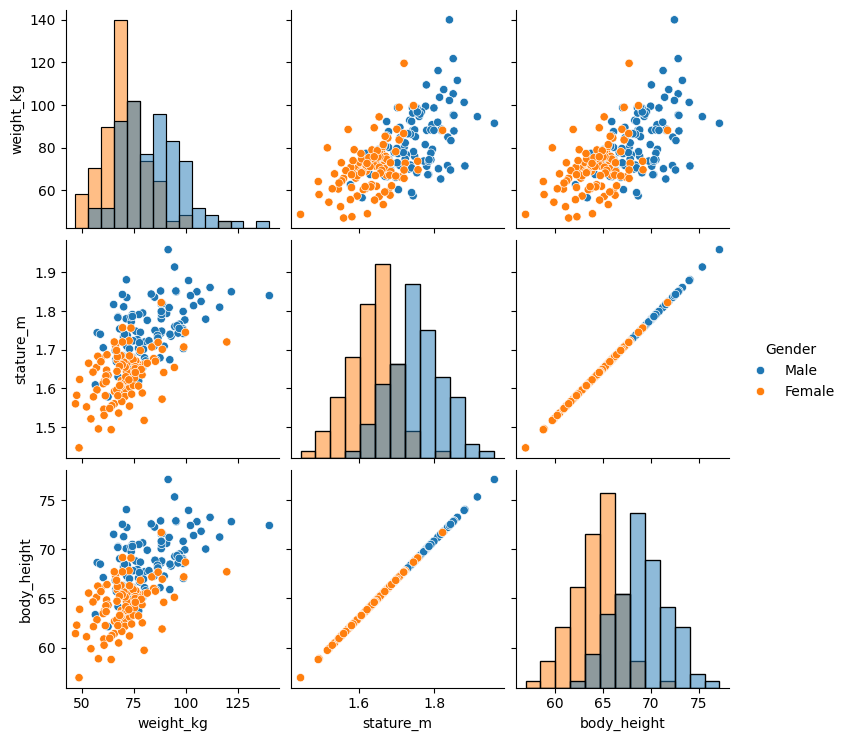

In [7]:
sns.pairplot(ansur_df_1, hue="Gender", diag_kind="hist")

##### Instructions 2/4

* Two features are basically duplicates, remove one of them from the dataset.

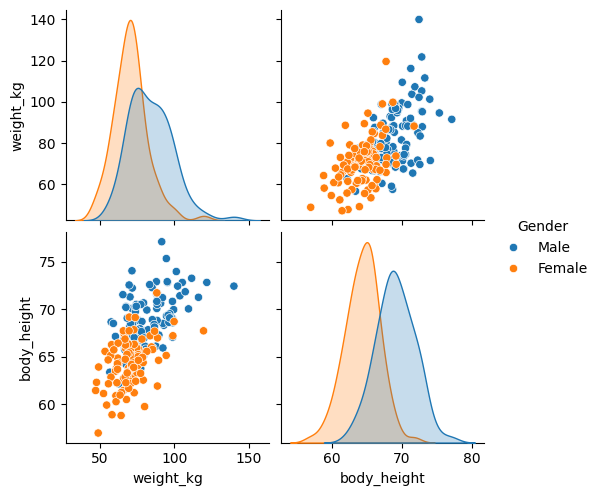

In [8]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop("stature_m", axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue="Gender")

##### Instructions 3/4

* Now create a pairplot of the `ansur_df_2` data sample and color the points using the `'Gender'` feature.

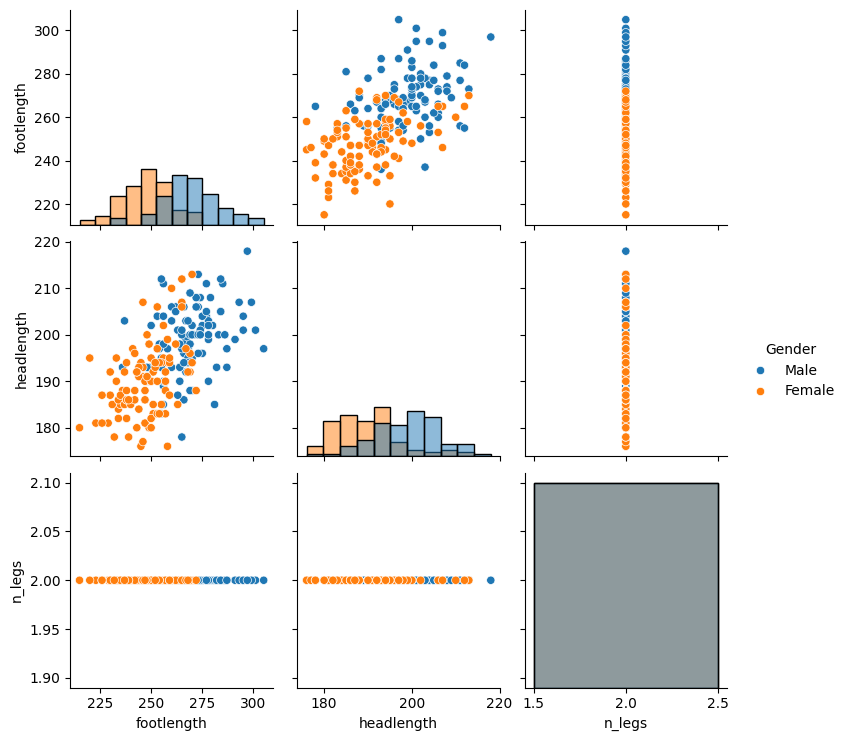

In [10]:
sns.pairplot(ansur_df_2, hue="Gender", diag_kind="hist")

##### Instructions 4/4

* One feature has no variance, remove it from the dataset.

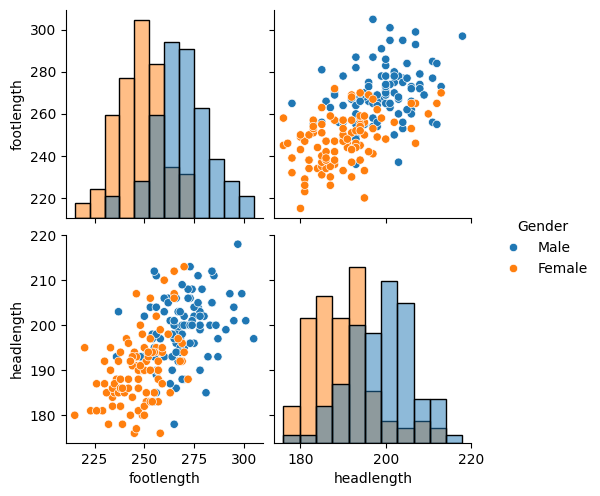

In [11]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop("n_legs", axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue="Gender", diag_kind="hist")

#### Advantage of feature selection

What advantage does feature selection have over feature extraction?

Answer the question

**Possible Answers**

1. Feature selection allows you to do a stronger reduction in the number of dimensions.
2. Less information is lost during feature selection compared to feature extraction.
3. The selected features remain unchanged, and are therefore easier to interpret.
4. Models will never overfit to a sub-selected dataset.

**Answer**

3. The selected features remain unchanged, and are therefore easier to interpret.

### t-SNE visualization of high-dimensional data

Next, you'll learn to apply t-Distributed Stochastic Neighbor Embedding or t-SNE. While this may sound scary, it's just a powerful technique to visualize high dimensional data using feature extraction. 

t-SNE will maximize the distance in two-dimensional space between observations that are most different in a high-dimensional space (because of this, observations that are similar will be close to one another and may become clustered).

This is what happens when we apply t-SNE to the Iris dataset.

![Alt text](images/t-sne_on_iris_dataset.png)

We can see how the Setosa species forms a separate cluster, while the other two are closer together and therefore more similar.

In [2]:
# not exactly the same data from the video
ansur_female = pd.read_csv("data/ansur_2_female.csv")

ansur_female.shape

(6068, 94)

In [3]:
# t-sne does not work with non-numeric columns
# (we could use one-hot encoding)
ansur_female.describe(exclude="number")

,Branch,Component,Gender
count,6068,6068,6068
unique,3,3,2
top,Combat Service Support,Regular Army,Male
freq,3174,3140,4082


In [16]:
non_numeric = [
    "Gender",
    "Date",
    "Installation",
    "Component",
    "Branch",
    "PrimaryMOS",
    "SubjectsBirthLocation",
    "Ethnicity",
    "WritingPreference",
]

ansur_female_numeric = ansur_female.drop(non_numeric, axis=1)

ansur_female_numeric.shape

(1986, 99)

### Fitting t-SNE

While fitting to the dataset, t-SNE will try different configurations and evaluate these with an internal cost function. High learning rates will cause the algorithm to be more adventurous in the configurations it tries out while low learning rates will cause it to be conservative. Usually, learning rates fall in the 10 to 1000 range.  

In [17]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

Next, we'll fit and transform the TSNE model to our numeric dataset. This will project our high-dimensional dataset onto a NumPy array with two dimensions.

In [18]:
tsne_features = m.fit_transform(ansur_female_numeric)

tsne_features[1:4, :]

array([[-47.324135,  23.086021],
       [-46.86244 ,  23.17527 ],
       [-46.152664,  22.244335]], dtype=float32)

We'll assign these two dimensions back to our original dataset naming them 'x' and 'y'. 

In [19]:
ansur_female_numeric["x"] = tsne_features[:, 0]

ansur_female_numeric["y"] = tsne_features[:, 1]

<Axes: xlabel='x', ylabel='y'>

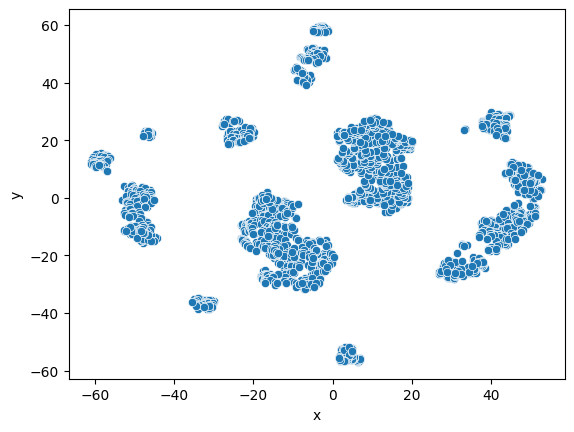

In [21]:
import seaborn as sns

sns.scatterplot(x="x", y="y", data=ansur_female_numeric)

The video's output:

![Alt text](images/plotting_t-sne.png)

The resulting plot shows one big cluster, and in a sense, this could have been expected. There are no distinct groups of female body shapes with little in between, instead, there is a more continuous distribution of body shapes, and thus, one big cluster. However, using the categorical features we excluded from the analysis, we can check if there are interesting structural patterns within this cluster. 

The Body Mass Index or BMI is a method to categorize people into weight groups regardless of their height. I added a column 'BMI_class' to the dataset with the BMI category for every person. If we use this column name for the hue, which is the color, of the seaborn scatterplot, we'll be able to see that weight class indeed shows an interesting pattern. 

```python
sns.scatterplot(x="x", y="y", hue="BMI_class", data=ansur_female_numeric)
```

![Alt text](images/coloring_points_by_bmi_class.png)

From the 90+ features in the dataset, TSNE picked up that weight explains a lot of variance in the dataset and used that to spread out points along the x-axis, with underweight people on the left and overweight people on the right. 

#### t-SNE intuition

t-SNE is super powerful, but do you know exactly when to use it?

What is a good use case to use t-SNE?

**Possible Answers**

1. When you want to visually check if two groups within your dataset differ significantly.
2. When you want to visually explore the patterns in a high dimensional dataset.
3. When you want to know the importance of specific features in a dataset.
4. When you want to sub-select the two most important features present in your dataset.

**Answer**

2. When you want to visually explore the patterns in a high dimensional dataset.

#### Fitting t-SNE to the ANSUR data

t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset `df` and fit `TSNE` to this numeric dataset.

##### Instructions

* Drop the non-numeric columns from the dataset.
* Create a `TSNE` model with learning rate 50.
* Fit and transform the model on the numeric dataset.

In [4]:
# setup
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE


df = pd.read_csv("data/ansur_female.csv")

In [6]:
non_numeric = ["Branch", "Gender", "Component"]

df_numeric = df.drop(non_numeric, axis=1)

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_numeric)

tsne_features.shape

(6068, 2)

#### t-SNE visualisation of dimensionality

Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features (`'x'` and `'y'`) which were added to the dataset df. In each scatterplot you'll color the points according to a different categorical variable.

`seaborn` has already been imported as `sns` and `matplotlib.pyplot` as `plt`.

##### Instructions 1/3

* Use seaborn's `sns.scatterplot` to create the plot.
* Color the points by `'Component'`.

In [8]:
# setup
df = pd.read_csv("data/ansur_male_female.csv")

<Axes: xlabel='x', ylabel='y'>

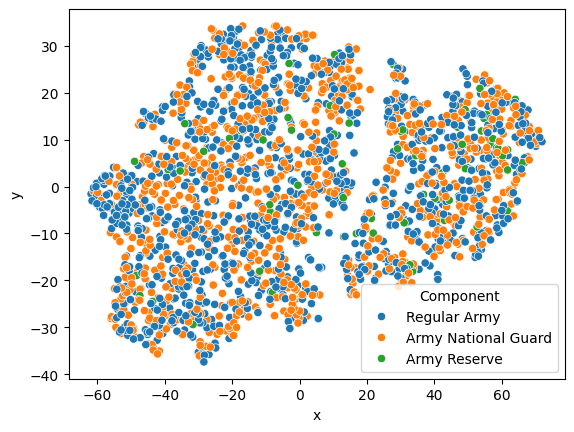

In [9]:
sns.scatterplot(x="x", y="y", hue="Component", data=df)

##### Instructions 2/3

* Color the points of the scatterplot by 'Branch'.

<Axes: xlabel='x', ylabel='y'>

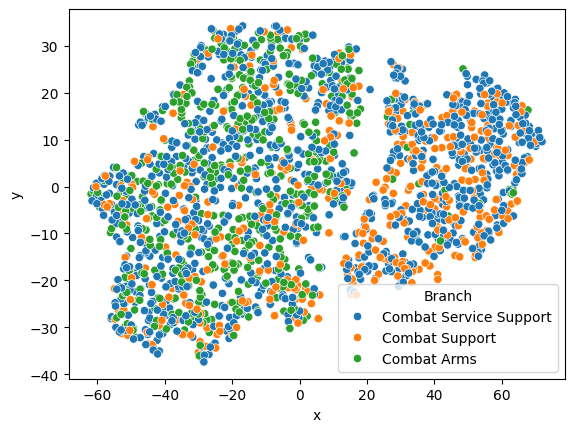

In [11]:
sns.scatterplot(x="x", y="y", hue="Branch", data=df)

##### Instructions 3/3

* Color the points of the scatterplot by 'Gender'.

<Axes: xlabel='x', ylabel='y'>

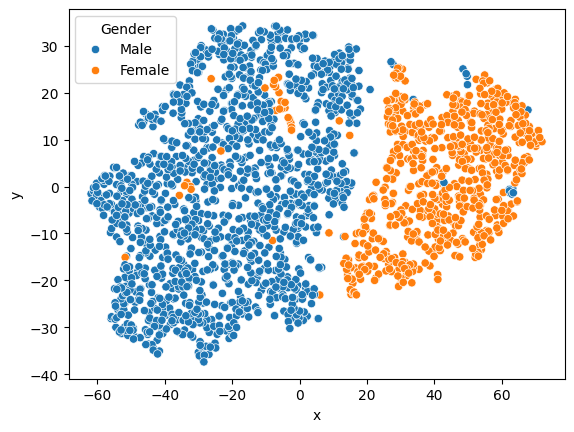

In [12]:
sns.scatterplot(x="x", y="y", hue="Gender", data=df)